## Import necessary libraries

In [24]:
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import classification_report

plt.style.use('ggplot')

In [2]:
df = pd.read_csv('/kaggle/input/datacamps-data-science-associate-certification/fitness_class_2212.csv')
df.head()

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0


## Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
booking_id,1500.0,750.500000,433.157015,1.00,375.75,750.50,1125.25,1500.00
months_as_member,1500.0,15.628667,12.926543,1.00,8.00,12.00,19.00,148.00
weight,1480.0,82.610378,12.765859,55.41,73.49,80.76,89.52,170.52
attended,1500.0,0.302667,0.459565,0.00,0.00,0.00,1.00,1.00


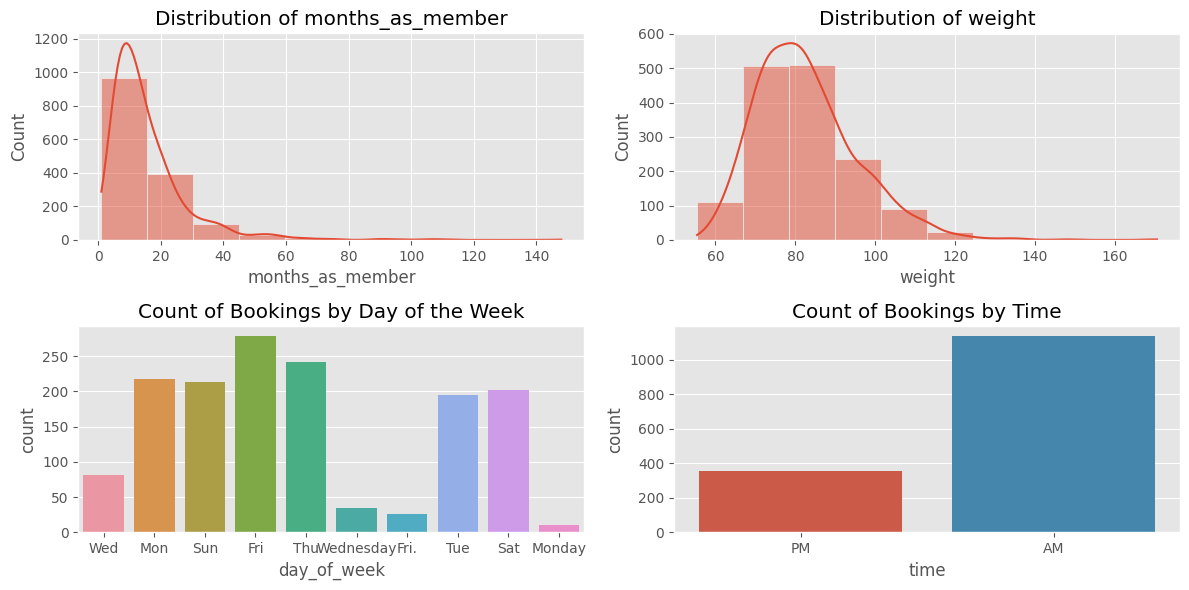

In [5]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.histplot(df['months_as_member'], bins=10, kde=True)
plt.title('Distribution of months_as_member')

plt.subplot(2, 2, 2)
sns.histplot(df['weight'], bins=10, kde=True)
plt.title('Distribution of weight')

plt.subplot(2, 2, 3)
sns.countplot(data=df, x='day_of_week')
plt.title('Count of Bookings by Day of the Week')

plt.subplot(2, 2, 4)
sns.countplot(data=df, x='time')
plt.title('Count of Bookings by Time')

plt.tight_layout()
plt.show()

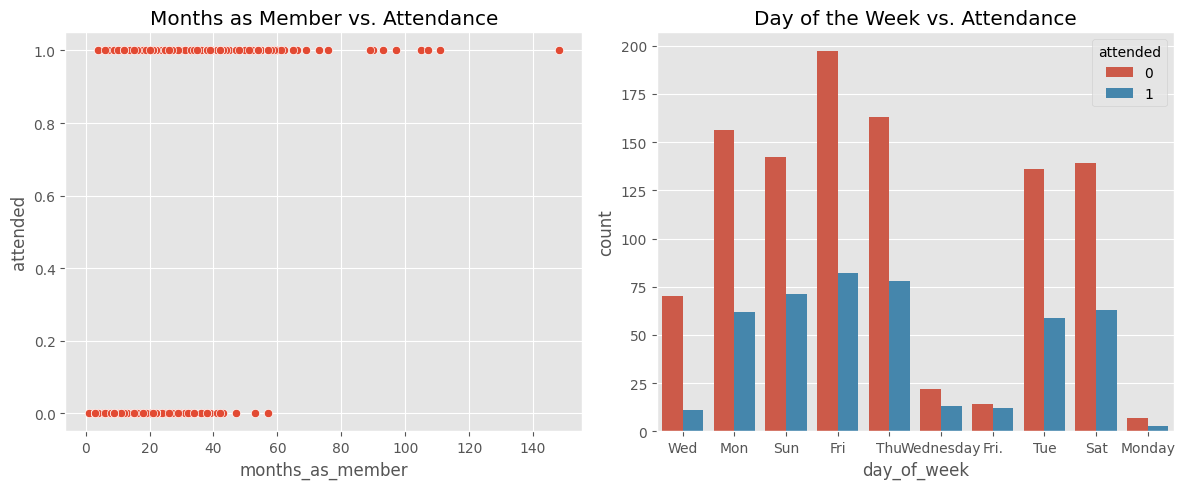

In [6]:
plt.figure(figsize=(12, 5))

# Scatter plot for 'months_as_member' vs. 'attended'
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='months_as_member', y='attended')
plt.title('Months as Member vs. Attendance')

# Stacked bar chart for 'day_of_week' vs. 'attended'
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='day_of_week', hue='attended')
plt.title('Day of the Week vs. Attendance')

plt.tight_layout()
plt.show()

## Preprocessing

In [16]:
numerical_columns = [column for  column in df.columns if df[column].dtype in ["int64","float64"]]
numerical_columns.remove('booking_id')
numerical_columns.remove('attended')

categorical_columns = [column for  column in df.columns if df[column].dtype == 'object']
numerical_preprocessor = Pipeline(steps=[
    ("imputer",SimpleImputer(strategy='mean')),
    ("scaler",MinMaxScaler())
])

categorical_preprocessor = Pipeline(steps=[
    ("imputer",SimpleImputer(strategy='most_frequent')),
    ("onehot",OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("numerical",numerical_preprocessor,numerical_columns),
        ("categorical",categorical_preprocessor,categorical_columns)
    ]
)

In [20]:
X = df.drop(['attended','booking_id'],axis=1)
y = df['attended']

X_train,X_test, y_train,y_test = train_test_split(X,y,
                                                 test_size=0.20,random_state=42)
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

y_train = np.array(y_train)
y_test = np.array(y_test)

## Modeling

In [22]:
cat = CatBoostClassifier(learning_rate=0.015111231112,n_estimators=350,depth=5,silent=True)
cat.fit(X_train,y_train)
preds = cat.predict(X_test)

In [23]:
from sklearn.metrics import f1_score, accuracy_score

print(f"The accuracy is {accuracy_score(y_test,preds)}")

print(f"The F1 score is {f1_score(y_test,preds)}")

The accuracy is 0.77
The F1 score is 0.6057142857142858


In [27]:
report = classification_report(y_test,preds)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       197
           1       0.74      0.51      0.61       103

    accuracy                           0.77       300
   macro avg       0.76      0.71      0.72       300
weighted avg       0.77      0.77      0.76       300

